In [ ]:
# Neural Networks in Keras (Lesson5)
# dowloaded    small_test_traffic.p, small_train_traffic.

# Testing in Keras (Lesson10)
!python --version
import keras; print('Keras ' + keras.__version__)
import tensorflow as tf; print('TensorFlow ' + tf.__version__)

In [3]:
import csv

import cv2
from skimage import io


#default
ubu_file01='./data/data/'
ubu_file02='./bag/add00/'
win_file01='./bag/bag00/'
win_file02='./bag/bag01/'
win_file03='./bag/rev00/'
win_file04='./bag/rev01/'

xfile=[ubu_file01,ubu_file02,win_file01,win_file02,win_file03,win_file04]


import numpy as np
cImages = np.array( [] )
lImages = np.array( [] )
rImages = np.array( [] )

steering=np.array( [] )
speed=np.array( [] )

step=0
element=0

for j in range(6):

        lines=[]
        print(xfile[j])
        with open(xfile[j]+'driving_log.csv') as csvfile:
                reader = csv.reader(csvfile)
                for line in reader:
                    lines.append(line)


        for line in lines:
            if(line[3]=='steering'):
                 continue;

            #################
            #for debug
            step=step+1;
            if(step%200):
                continue
            check=float(line[3])
            if(np.absolute(check)<0.001):
                   continue; 
            #################    
            element=element+1

            if(steering.shape[0]==0):
                steering=np.array([float(line[3])])
                speed=np.array([float(line[6])])        
            else:
                steering=np.append(steering,float(line[3]))
                speed=np.append(speed,float(line[6]))

            for i in range (3):
                source_path=line[i]
                #  csvから画像ファイル名を取得    
                filename=source_path.split('/')[-1]
                filename=filename.rsplit('\\')[-1]
                #print(filename)

                #　パス名を変更
                #  print(filename)
                current_path=xfile[j]+'IMG/'+filename
                #  print(current_path)    

                #　OpenCVのimreadを使うとBGRで読み込み
                #  images.append(cv2.imread(current_path))
                #　skimageのimreadを使うとRGBで読み込み

                if(i==0):
                    if(cImages.shape[0]==0):
                        cImages=io.imread(current_path)
                    else:
                        cImages=np.append(cImages,io.imread(current_path))
                if(i==1):
                    if(lImages.shape[0]==0):
                        lImages=io.imread(current_path)
                    else:
                        lImages=np.append(lImages,io.imread(current_path))
                if(i==2):
                    if(rImages.shape[0]==0):
                        rImages=io.imread(current_path)
                    else:
                        rImages=np.append(rImages,io.imread(current_path))

cImages=np.reshape(cImages,[element,160,320,3])
rImages=np.reshape(rImages,[element,160,320,3])
lImages=np.reshape(lImages,[element,160,320,3])

xImages=cImages
xMesurements=steering


./data/data/
./bag/add00/
./bag/bag00/
./bag/bag01/


(20, 160, 320, 3) (120, 160, 320, 3) (120,)


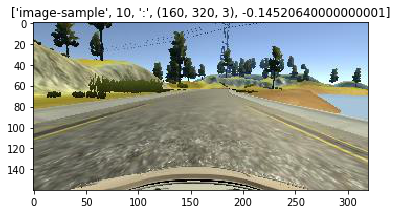

In [4]:
lesson=14
#lesson 11 (training add mirror image )
#lesson 12 (using multi camera-view and tuneup steering-info )
#lesson 13 Kerasで画像を切り取る

if(lesson>=12):
    #左カメラ画像に対してはステアをプラス増分、右カメラについてはステア角度をマイナス増分
    xImages=np.append(xImages,lImages)
    xMesurements=np.append(xMesurements,steering+0.3)
    xImages=np.append(xImages,rImages)
    xMesurements=np.append(xMesurements,steering-0.3)

    xImages=np.reshape(xImages,[3*element,160,320,3])
    
if(lesson>=11):
    augument_images, augument_mesurements=[],[]
    for image,mesurements in zip(xImages,xMesurements):
        augument_images.append(image)
        augument_mesurements.append(mesurements)
        augument_images.append(cv2.flip(image,1))
        augument_mesurements.append(mesurements*-1.0)
    X_train=np.array(augument_images)
    y_train=np.array(augument_mesurements)    
else:
    X_train=np.array(xImages)
    y_train=np.array(xMesurements)
    
    
print(cImages.shape,X_train.shape,y_train.shape)
###########################################
import matplotlib.pyplot as plt
%matplotlib inline
i=int(element/2)
T=X_train[i]
plt.imshow(T.squeeze())
plt.imshow(T.squeeze())
plt.title(['image-sample',i,':',T.shape,steering[i]])
plt.show()

In [9]:
from keras.models import Sequential
#lesson=7
#from keras.layers import Flatten, Dense
#lesson>=9 (with lambda)
from keras.layers import Flatten, Dense,Lambda,Dropout,Cropping2D
#lesson>=10 (with convolution)
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

########

model = Sequential()
#################

if(lesson<14):
        if(lesson==9):
            model.add(Lambda(lambda x:x /255.0 -0.5 ,input_shape=(160,320,3)))
            model.add(Flatten())
        if(lesson==7):
            model.add(Flatten(input_shape=(160,320,3)))

        if(lesson>=10):
            model.add(Lambda(lambda x:x /255.0 -0.5 ,input_shape=(160,320,3)))
            #Lambda正規化を行わないの場合、第1階層Convolution2Dの引数に対してinput_shapeの指定が必要
            #model.add(Convolution2D(6,5,5 ,input_shape=(160,320,3),activation="relu"))
            if(lesson>=13):
                model.add(Cropping2D(cropping=((70,25),(0,0))))
            model.add(MaxPooling2D())
            model.add(Dropout(0.9))
            model.add(Convolution2D(6,5,5,activation="rlesson=14elu"))
            model.add(MaxPooling2D())
            model.add(Dropout(0.5))
            model.add(Flatten())
            model.add(Dense(120))
            model.add(Dense(84))
if(lesson==14):
            model.add(Lambda(lambda x:x /255.0 -0.5 ,input_shape=(160,320,3)))
            model.add(Cropping2D(cropping=((70,25),(0,0))))  
            model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
            model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
            model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
            model.add(Convolution2D(64,3,3,activation="relu"))
            model.add(Convolution2D(64,3,3,activation="relu"))
            model.add(Flatten())
            model.add(Dense(100))
            model.add(Dense(50))
            model.add(Dense(10))
                
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
if(lesson>=10):
    model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=5)
if(lesson==9):
    model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=2)
if(lesson==7):from keras.models import Sequential
#lesson=7
#from keras.layers import Flatten, Dense
#lesson>=9 (with lambda)
from keras.layers import Flatten, Dense,Lambda,Dropout,Cropping2D
#lesson>=10 (with convolution)
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

########

model = Sequential()
#################

if(lesson<14):
        if(lesson==9):
            model.add(Lambda(lambda x:x /255.0 -0.5 ,input_shape=(160,320,3)))
            model.add(Flatten())
        if(lesson==7):
            model.add(Flatten(input_shape=(160,320,3)))

        if(lesson>=10):
            model.add(Lambda(lambda x:x /255.0 -0.5 ,input_shape=(160,320,3)))
            #Lambda正規化を行わないの場合、第1階層Convolution2Dの引数に対してinput_shapeの指定が必要
            #model.add(Convolution2D(6,5,5 ,input_shape=(160,320,3),activation="relu"))
            if(lesson>=13):
                model.add(Cropping2D(cropping=((70,25),(0,0))))
            model.add(MaxPooling2D())
            model.add(Dropout(0.9))
            model.add(Convolution2D(6,5,5,activation="rlesson=14elu"))
            model.add(MaxPooling2D())
            model.add(Dropout(0.5))
            model.add(Flatten())
            model.add(Dense(120))
            model.add(Dense(84))
if(lesson==14):
            model.add(Lambda(lambda x:x /255.0 -0.5 ,input_shape=(160,320,3)))
            model.add(Cropping2D(cropping=((70,25),(0,0))))  
            model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
            model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
            model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
            model.add(Convolution2D(64,3,3,activation="relu"))
            model.add(Convolution2D(64,3,3,activation="relu"))
            model.add(Flatten())
            model.add(Dense(100))
            model.add(Dense(50))
            model.add(Dense(10))
                
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
if(lesson>=10):
    model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=5)
if(lesson==9):
    model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=2)
if(lesson==7):
    model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=7)

model.save('model.h5')
print('complete training')
    model.fit(X_train,y_train,validation_split=0.2,shuffle=True,nb_epoch=7)

model.save('model.h5')
print('complete training')

Train on 96 samples, validate on 24 samples
Epoch 1/5
96/96 [==============================] - 1s - loss: 0.0579 - val_loss: 0.1398
Epoch 2/5
96/96 [==============================] - 1s - loss: 0.0448 - val_loss: 0.1146
Epoch 3/5
96/96 [==============================] - 1s - loss: 0.0372 - val_loss: 0.0668
Epoch 4/5
96/96 [==============================] - 1s - loss: 0.0308 - val_loss: 0.0598
Epoch 5/5
96/96 [==============================] - 1s - loss: 0.0215 - val_loss: 0.0475
complete training


In [ ]:
def fibonacci():
    numbers_list = []
    while 1:
        if(len(numbers_list) < 2):
            numbers_list.append(1)
        else:
            numbers_list.append(numbers_list[-1] + numbers_list[-2])
        yield 1 # change this line so it yields its list instead of 1

our_generator = fibonacci()
my_output = []

for i in range(10):
    my_output = (next(our_generator))
    
print(my_output)

In [ ]:

from keras.models import Model
import matplotlib.pyplot as plt

history_object = model.fit_generator(train_generator, samples_per_epoch =
    len(train_samples), validation_data = 
    validation_generator,
    nb_val_samples = len(validation_samples), 
    nb_epoch=5, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()
